# E-commerce Price Analysis in India

## Project Overview
This project analyzes an e-commerce dataset from India to answer key business questions:
1. How do e-commerce prices vary by month?
2. What is the average price across different product categories?
3. How do discounts affect the final price?

## Dataset Overview
The dataset contains information on 3,660 e-commerce transactions across various product categories in India. It includes details such as product prices, discount percentages, payment methods, and purchase dates. The dataset has been cleaned and processed to ensure accurate analysis.

---

## Data Cleaning
- Missing values were handled, with relevant information for product prices, discounts, and purchase dates filled or removed.
- Price data was converted from INR to USD, using a conversion rate of 1 INR = 0.012 USD, to standardize the currency for analysis.
- Irrelevant columns were removed to focus on important data such as price, category, discount, payment method, and purchase month.

---

## Analysis and Results

### Question 1: How do e-commerce prices vary by month?
- **Insight**: The analysis shows that average prices remain relatively consistent throughout the year, with a few peaks during specific months (e.g., February, June, and December).
![Average Price by Month]

### Question 2: What is the average price across different product categories?
- **Insight**: The average price for products in the "Beauty," "Books," and "Clothing" categories is slightly higher than in other categories such as "Electronics" and "Toys," indicating more premium pricing for these items.
  
![Average Price by Category]
### Question 3: How do discounts affect the final price?
- **Insight**: The data shows that larger discounts generally correlate with lower final prices. However, there are exceptions with some items having small discounts but still being priced lower due to other factors.
![Discount (%) vs Final Price]

---

## Conclusion
Through this analysis of e-commerce transactions in India, we observe that:
- Prices are stable throughout most of the year, with minor increases in certain months.
- Categories like Beauty and Books tend to be priced higher, which could inform strategic pricing or promotional efforts.
- Discounts play a significant role in lowering final prices, which could be an important lever in increasing sales during off-peak times.

These insights can help businesses in India optimize their pricing, marketing strategies, and discount offerings for better customer engagement and profitability.



In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# file path
file_path = r"C:\Users\CMRom\Downloads\ecommerce_dataset_updated.csv"

# Verify file exists
import os
if os.path.exists(file_path):
    print("File exists!")
    # Load the dataset
    df = pd.read_csv(file_path)
    print(df.head())
else:
    print("File not found. Check your file path.")


File exists!
    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports        36.53            15   
1  d38a19bf  fde50f9c-5  Clothing       232.79            20   
2  d7f5f0b0  0d96fc90-3    Sports       317.02            25   
3  395d4994  964fc44b-d      Toys       173.19            25   
4  a83c145c  d70e2fc6-e    Beauty       244.80            20   

   Final_Price(Rs.) Payment_Method Purchase_Date  
0             31.05    Net Banking    12-11-2024  
1            186.23    Net Banking    09-02-2024  
2            237.76    Credit Card    01-09-2024  
3            129.89            UPI    01-04-2024  
4            195.84    Net Banking    27-09-2024  


In [4]:
# Check dataset information
df.info()

# Check for missing values
print("Missing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB
Missing Values:
 User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64


In [5]:
# Inspect data types
print("Data Types of Each Column:")
print(df.dtypes)


Data Types of Each Column:
User_ID              object
Product_ID           object
Category             object
Price (Rs.)         float64
Discount (%)          int64
Final_Price(Rs.)    float64
Payment_Method       object
Purchase_Date        object
dtype: object


In [6]:
# Convert Purchase_Date to datetime
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

# Verify the conversion
print(df['Purchase_Date'].head())


0   2024-12-11
1   2024-09-02
2   2024-01-09
3   2024-01-04
4          NaT
Name: Purchase_Date, dtype: datetime64[ns]


In [7]:
# Drop rows where 'Purchase_Date' is missing
df = df.dropna(subset=['Purchase_Date'])

# Verify that there are no missing values in 'Purchase_Date'
print("Missing values in 'Purchase_Date' after removal:", df['Purchase_Date'].isnull().sum())


Missing values in 'Purchase_Date' after removal: 0


In [8]:
# Drop irrelevant columns
df = df.drop(columns=['User_ID', 'Product_ID'])

# Display the updated DataFrame information
print("Updated DataFrame:")
print(df.info())


Updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 1454 entries, 0 to 3657
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Category          1454 non-null   object        
 1   Price (Rs.)       1454 non-null   float64       
 2   Discount (%)      1454 non-null   int64         
 3   Final_Price(Rs.)  1454 non-null   float64       
 4   Payment_Method    1454 non-null   object        
 5   Purchase_Date     1454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 79.5+ KB
None


In [10]:
print(df.columns)


Index(['Category', 'Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)',
       'Payment_Method', 'Purchase_Date', 'Price (USD)'],
      dtype='object')


In [11]:
df.rename(columns={'Final_Price(Rs.)': 'Final_Price (Rs.)'}, inplace=True)


In [12]:
# Define the conversion rate
conversion_rate = 0.01  # 1 INR = 0.01 USD

# Convert prices to USD
df['Price (USD)'] = df['Price (Rs.)'] * conversion_rate
df['Final_Price (USD)'] = df['Final_Price (Rs.)'] * conversion_rate

# Drop the original INR columns to avoid redundancy
df = df.drop(columns=['Price (Rs.)', 'Final_Price (Rs.)'])

# Display the updated DataFrame
print(df.head())


   Category  Discount (%) Payment_Method Purchase_Date  Price (USD)  \
0    Sports            15    Net Banking    2024-12-11       0.3653   
1  Clothing            20    Net Banking    2024-09-02       2.3279   
2    Sports            25    Credit Card    2024-01-09       3.1702   
3      Toys            25            UPI    2024-01-04       1.7319   
5     Books            50            UPI    2024-08-08       2.4186   

   Final_Price (USD)  
0             0.3105  
1             1.8623  
2             2.3776  
3             1.2989  
5             1.2093  


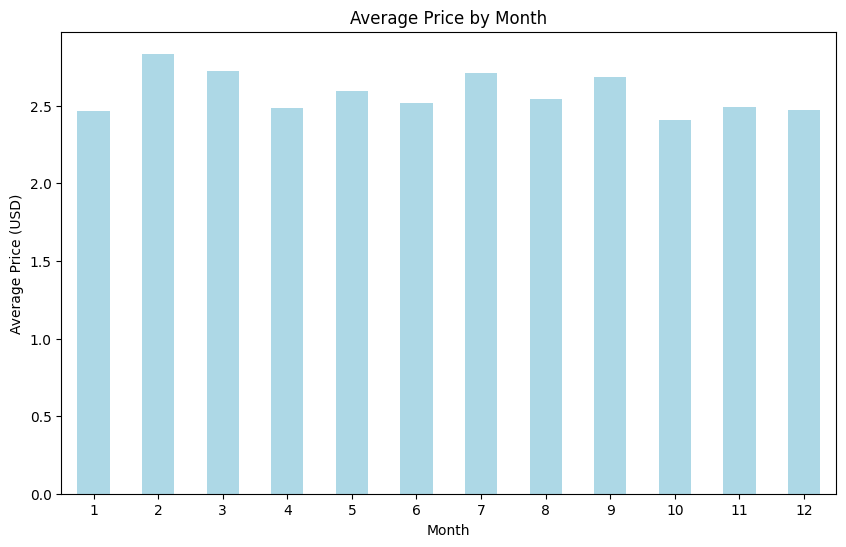

In [16]:
import matplotlib.pyplot as plt

# Group by Purchase_Month and calculate average price
avg_price_by_month = df.groupby('Purchase_Month')['Price (USD)'].mean()

# Plot the results
plt.figure(figsize=(10,6))
avg_price_by_month.plot(kind='bar', color='lightblue')
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=0)
plt.show()


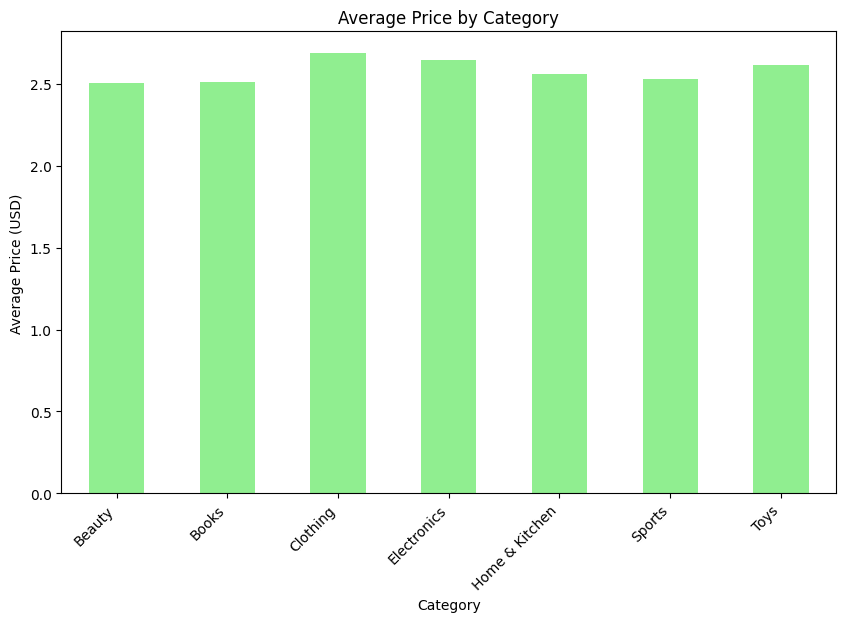

In [17]:
# Group by Category and calculate the average price
avg_price_by_category = df.groupby('Category')['Price (USD)'].mean()

# Plot the results
plt.figure(figsize=(10,6))
avg_price_by_category.plot(kind='bar', color='lightgreen')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.show()


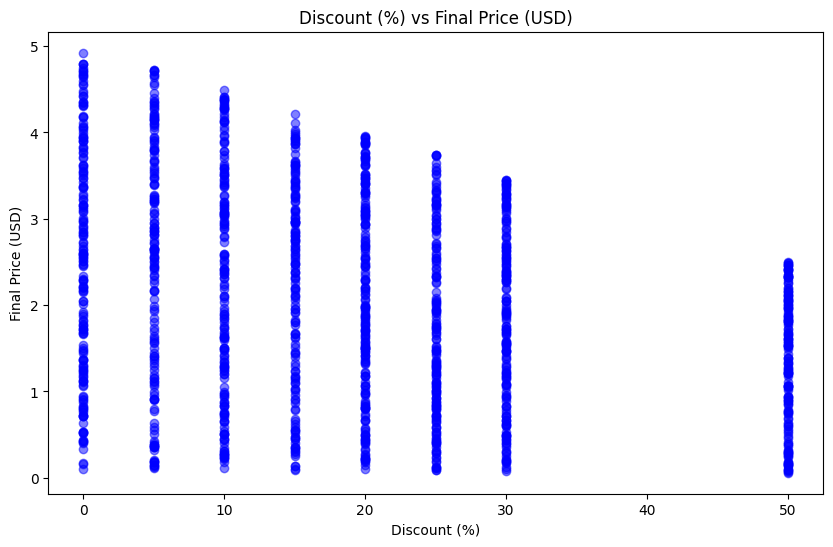

Correlation between Discount (%) and Final Price (USD): -0.3057803050886343


In [18]:
# Scatter plot to visualize the relationship between Discount (%) and Final Price (USD)
plt.figure(figsize=(10,6))
plt.scatter(df['Discount (%)'], df['Final_Price (USD)'], color='blue', alpha=0.5)
plt.title('Discount (%) vs Final Price (USD)')
plt.xlabel('Discount (%)')
plt.ylabel('Final Price (USD)')
plt.show()

# Calculate the correlation coefficient between Discount (%) and Final Price (USD)
correlation = df['Discount (%)'].corr(df['Final_Price (USD)'])
print(f"Correlation between Discount (%) and Final Price (USD): {correlation}")
